In [992]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from matplotlib.pyplot import figure
import matplotlib.dates as mdates
import datetime
import seaborn as sns
from matplotlib.dates import DateFormatter
import matplotlib.patches as mpatches
from sklearn.metrics import mean_squared_error
import numpy as np
from statistics import mode

In [993]:
df_validation = pd.read_csv(r'../../data/tidy/energy-validation-april2022-31march.csv', delimiter=',', skiprows=0, low_memory=False)

In [994]:
#df_validation

In [995]:
# Remove rows with negative validation data
df_validation=df_validation.loc[df_validation['gallons']>0]

In [996]:
df_validation

,Unnamed: 0,timestamp,equipment_id,gallons,date,Powertrain
0,58909,2022-03-31 00:11:00,3310,33.10,2022-03-31,conventional
1,58910,2022-03-31 00:17:00,3303,6.40,2022-03-31,conventional
2,58911,2022-03-31 00:25:00,3320,12.40,2022-03-31,conventional
3,58912,2022-03-31 00:41:00,3402,34.80,2022-03-31,hybrid
4,58913,2022-03-31 00:49:00,3226,39.40,2022-03-31,conventional
...,...,...,...,...,...,...
3065,59563,2022-04-30 22:52:00,3228,20.90,2022-04-30,conventional
3066,24290,2022-04-30 22:53:00,1862,41.22,2022-04-30,conventional
3067,59564,2022-04-30 23:29:00,3314,23.50,2022-04-30,conventional
3068,59565,2022-04-30 23:43:00,3401,40.60,2022-04-30,hybrid


In [997]:
df_validation.sort_values(by=['equipment_id','timestamp'], inplace=True)

In [998]:
df_validation.drop(['Unnamed: 0'], axis=1, inplace=True)

In [999]:
#df_model

In [1000]:
df_model = pd.read_csv(r'../../results/computed-fuel-rates.csv', delimiter=',', skiprows=0, low_memory=False)

In [1001]:
#df_model
df_model.drop(['Unnamed: 0'], axis=1, inplace=True)
df_model.drop(['Unnamed: 0.1'], axis=1, inplace=True)
df_model.drop(['Unnamed: 0.2'], axis=1, inplace=True)
df_model.drop(['Unnamed: 0.3'], axis=1, inplace=True)
df_model.drop(['Unnamed: 0.4'], axis=1, inplace=True)

In [1002]:
df_model.sort_values(by=['Vehicle','ServiceDateTime'], inplace=True)

In [1003]:
df_validation.rename(columns={"timestamp": "ServiceDateTime","equipment_id":"Vehicle"}, inplace=True)

In [1004]:
df_validation_vehicles=df_validation['Vehicle'].unique()

In [1005]:
df_model_vehicles=df_model['Vehicle'].unique()

In [1006]:
#df_validation.head(100)

In [1007]:
df_validation["dist"] = np.nan
df_validation["Energy"] = np.nan
df_validation["VehicleModel"] = np.nan

In [1008]:
df_validation.sort_values(by=['Vehicle','ServiceDateTime'], inplace=True)

In [1009]:
df_validation['ServiceDateTime'] = pd.to_datetime(df_validation['ServiceDateTime'])

In [1010]:
df_model['ServiceDateTime']=pd.to_datetime(df_model['ServiceDateTime'])

In [1011]:
df_validation['ServiceDateTime']=pd.to_datetime(df_validation['ServiceDateTime'])

In [1012]:
df_validation.dtypes

ServiceDateTime    datetime64[ns]
Vehicle                     int64
gallons                   float64
date                       object
Powertrain                 object
dist                      float64
Energy                    float64
VehicleModel              float64
dtype: object

In [1013]:
df_validation.sort_values(by=['Vehicle','ServiceDateTime'])

,ServiceDateTime,Vehicle,gallons,date,Powertrain,dist,Energy,VehicleModel
2659,2022-04-27 17:39:00,1320,0.68,2022-04-27,electric,NaN,NaN,NaN
2920,2022-04-29 18:56:00,1320,0.69,2022-04-29,electric,NaN,NaN,NaN
1760,2022-04-18 18:24:00,1321,1.83,2022-04-18,electric,NaN,NaN,NaN
1857,2022-04-19 17:56:00,1321,0.58,2022-04-19,electric,NaN,NaN,NaN
2915,2022-04-29 18:47:00,1321,0.66,2022-04-29,electric,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2437,2022-04-25 18:43:00,7902,24.60,2022-04-25,conventional,NaN,NaN,NaN
2576,2022-04-26 20:14:00,7902,12.20,2022-04-26,conventional,NaN,NaN,NaN
2656,2022-04-27 17:23:00,7902,23.80,2022-04-27,conventional,NaN,NaN,NaN
2878,2022-04-29 06:56:00,7902,19.00,2022-04-29,conventional,NaN,NaN,NaN


In [1014]:
df_validation=df_validation.reset_index()

In [1015]:
df_validation.head(20)

,index,ServiceDateTime,Vehicle,gallons,date,Powertrain,dist,Energy,VehicleModel
0,2659,2022-04-27 17:39:00,1320,0.68,2022-04-27,electric,NaN,NaN,NaN
1,2920,2022-04-29 18:56:00,1320,0.69,2022-04-29,electric,NaN,NaN,NaN
2,1760,2022-04-18 18:24:00,1321,1.83,2022-04-18,electric,NaN,NaN,NaN
3,1857,2022-04-19 17:56:00,1321,0.58,2022-04-19,electric,NaN,NaN,NaN
4,2915,2022-04-29 18:47:00,1321,0.66,2022-04-29,electric,NaN,NaN,NaN
5,68,2022-03-31 19:33:00,1322,0.49,2022-03-31,electric,NaN,NaN,NaN
6,1788,2022-04-18 19:48:00,1322,0.50,2022-04-18,electric,NaN,NaN,NaN
7,1789,2022-04-18 19:49:00,1322,0.46,2022-04-18,electric,NaN,NaN,NaN
8,2809,2022-04-28 19:30:00,1322,0.51,2022-04-28,electric,NaN,NaN,NaN
9,173,2022-04-01 18:59:00,1323,0.53,2022-04-01,electric,NaN,NaN,NaN


In [1016]:
df_integrated_diesel = df_validation[(df_validation.Powertrain != 'electric')]

In [1017]:
df_integrated_diesel=df_integrated_diesel.reset_index()

In [1018]:
for i in df_integrated_diesel.index:
    dist_current=0
    if i==0:
        pass 
    else:
        if df_integrated_diesel['Vehicle'][i]==df_integrated_diesel['Vehicle'][i-1]:
            df_filtered=df_model.loc[(df_model['Vehicle']==df_integrated_diesel['Vehicle'][i])&(df_integrated_diesel['ServiceDateTime'][i-1]<df_model['ServiceDateTime'])&(df_model['ServiceDateTime']<df_integrated_diesel['ServiceDateTime'][i])]
            df_integrated_diesel.loc[i,'dist']=df_filtered['dist'].sum()
            df_integrated_diesel.loc[i,'Energy']=df_filtered['Energy'].sum()
            df_filtered=df_filtered.reset_index()
            #df_integrated_diesel.loc[i,'VehicleModel']=df_filtered['VehicleModel'].mode()
            #df_integrated_diesel.loc[i,'VehicleModel']=df_filtered.groupby(by='Vehicle')['VehicleModel'].mode()
        else:
            pass

In [1019]:
df_integrated_diesel

,level_0,index,ServiceDateTime,Vehicle,gallons,date,Powertrain,dist,Energy,VehicleModel
0,44,84,2022-03-31 20:49:00,1552,80.30,2022-03-31,conventional,NaN,NaN,NaN
1,45,136,2022-04-01 15:34:00,1552,27.43,2022-04-01,conventional,53.128981,18.357928,NaN
2,46,266,2022-04-02 18:30:00,1552,33.15,2022-04-02,conventional,52.538729,16.982936,NaN
3,47,512,2022-04-05 17:57:00,1552,52.29,2022-04-05,conventional,182.556936,37.014156,NaN
4,48,657,2022-04-06 19:49:00,1552,36.69,2022-04-06,conventional,38.274092,24.864292,NaN
...,...,...,...,...,...,...,...,...,...,...
3015,3064,2437,2022-04-25 18:43:00,7902,24.60,2022-04-25,conventional,70.479247,19.721750,NaN
3016,3065,2576,2022-04-26 20:14:00,7902,12.20,2022-04-26,conventional,52.211481,14.433267,NaN
3017,3066,2656,2022-04-27 17:23:00,7902,23.80,2022-04-27,conventional,87.466541,23.623140,NaN
3018,3067,2878,2022-04-29 06:56:00,7902,19.00,2022-04-29,conventional,109.002254,56.527670,NaN


In [1020]:
### Matching Vehicle models

In [1021]:
model = pd.read_csv(r'../../data/tidy/vehicles-summary.csv', delimiter=',', skiprows=0, low_memory=False)

In [1022]:
mydict = model.groupby('Model')['Equipment ID'].agg(list).to_dict()

In [1023]:
d = {val:key for key, lst in mydict.items() for val in lst}
df_integrated_diesel['VehicleModel'] = df_integrated_diesel['Vehicle'].map(d)

In [1024]:
df_integrated_diesel

,level_0,index,ServiceDateTime,Vehicle,gallons,date,Powertrain,dist,Energy,VehicleModel
0,44,84,2022-03-31 20:49:00,1552,80.30,2022-03-31,conventional,NaN,NaN,Gillig 35
1,45,136,2022-04-01 15:34:00,1552,27.43,2022-04-01,conventional,53.128981,18.357928,Gillig 35
2,46,266,2022-04-02 18:30:00,1552,33.15,2022-04-02,conventional,52.538729,16.982936,Gillig 35
3,47,512,2022-04-05 17:57:00,1552,52.29,2022-04-05,conventional,182.556936,37.014156,Gillig 35
4,48,657,2022-04-06 19:49:00,1552,36.69,2022-04-06,conventional,38.274092,24.864292,Gillig 35
...,...,...,...,...,...,...,...,...,...,...
3015,3064,2437,2022-04-25 18:43:00,7902,24.60,2022-04-25,conventional,70.479247,19.721750,NEW FLYER XDE60 (ARTIC)
3016,3065,2576,2022-04-26 20:14:00,7902,12.20,2022-04-26,conventional,52.211481,14.433267,NEW FLYER XDE60 (ARTIC)
3017,3066,2656,2022-04-27 17:23:00,7902,23.80,2022-04-27,conventional,87.466541,23.623140,NEW FLYER XDE60 (ARTIC)
3018,3067,2878,2022-04-29 06:56:00,7902,19.00,2022-04-29,conventional,109.002254,56.527670,NEW FLYER XDE60 (ARTIC)


In [1025]:
df_integrated_diesel['VehicleModel'].unique()

array(['Gillig 35', 'Gillig 40', 'NEW FLYER XD35', 'NEW FLYER XDE40',
       'NEW FLYER XD40', 'NEW FLYER XDE60 (ARTIC)'], dtype=object)

In [1026]:
df_integrated_diesel['Energy'].fillna(0, inplace=True)

In [1027]:
df_integrated_diesel['VehicleModel'].unique()

array(['Gillig 35', 'Gillig 40', 'NEW FLYER XD35', 'NEW FLYER XDE40',
       'NEW FLYER XD40', 'NEW FLYER XDE60 (ARTIC)'], dtype=object)

In [1028]:
df_integrated_diesel = df_integrated_diesel[df_integrated_diesel['Energy']!=0]

In [1029]:
df_integrated_diesel

,level_0,index,ServiceDateTime,Vehicle,gallons,date,Powertrain,dist,Energy,VehicleModel
1,45,136,2022-04-01 15:34:00,1552,27.43,2022-04-01,conventional,53.128981,18.357928,Gillig 35
2,46,266,2022-04-02 18:30:00,1552,33.15,2022-04-02,conventional,52.538729,16.982936,Gillig 35
3,47,512,2022-04-05 17:57:00,1552,52.29,2022-04-05,conventional,182.556936,37.014156,Gillig 35
4,48,657,2022-04-06 19:49:00,1552,36.69,2022-04-06,conventional,38.274092,24.864292,Gillig 35
5,49,749,2022-04-07 18:41:00,1552,45.61,2022-04-07,conventional,166.541198,33.728877,Gillig 35
...,...,...,...,...,...,...,...,...,...,...
3015,3064,2437,2022-04-25 18:43:00,7902,24.60,2022-04-25,conventional,70.479247,19.721750,NEW FLYER XDE60 (ARTIC)
3016,3065,2576,2022-04-26 20:14:00,7902,12.20,2022-04-26,conventional,52.211481,14.433267,NEW FLYER XDE60 (ARTIC)
3017,3066,2656,2022-04-27 17:23:00,7902,23.80,2022-04-27,conventional,87.466541,23.623140,NEW FLYER XDE60 (ARTIC)
3018,3067,2878,2022-04-29 06:56:00,7902,19.00,2022-04-29,conventional,109.002254,56.527670,NEW FLYER XDE60 (ARTIC)


In [1030]:
df_integrated_diesel['dist'] = df_integrated_diesel['dist'].astype(float)
df_integrated_diesel['Energy'] = df_integrated_diesel['Energy'].astype(float)

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\858975720.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['dist'] = df_integrated_diesel['dist'].astype(float)
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_25572\858975720.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_integrated_diesel['Energy'] = df_integrated_diesel['Energy'].astype(float)


In [1031]:
train_dates=['2022-04-01','2022-04-02','2022-04-03','2022-04-04','2022-04-05','2022-04-06','2022-04-07','2022-04-08','2022-04-09','2022-04-10','2022-04-11','2022-04-12','2022-04-13', '2022-04-14','2022-04-15','2022-04-16','2022-04-17','2022-04-18','2022-04-19','2022-04-20','2022-04-21','2022-04-22','2022-04-23']
train = df_integrated_diesel[df_integrated_diesel.date.isin(train_dates)]
test_dates=['2022-04-24','2022-04-25','2022-04-26','2022-04-27','2022-04-28','2022-04-29','2022-04-30']
test = df_integrated_diesel[df_integrated_diesel.date.isin(test_dates)]

In [1032]:
df_hybrid=df_integrated_diesel.loc[df_integrated_diesel['Powertrain'] == 'hybrid'].copy()
df_conventional=df_integrated_diesel.loc[df_integrated_diesel['Powertrain'] == 'conventional'].copy()

In [1033]:
df_hybrid_train=train.loc[train['Powertrain'] == 'hybrid'].copy()
df_hybrid_test=test.loc[test['Powertrain'] == 'hybrid'].copy()
df_conventional_train=train.loc[train['Powertrain'] == 'conventional'].copy()
df_conventional_test=test.loc[test['Powertrain'] == 'conventional'].copy()

In [1034]:
rmse_conventional_train= mean_squared_error(df_conventional_train['gallons'], df_conventional_train['Energy'], squared=False)
rmse_conventional_test= mean_squared_error(df_conventional_test['gallons'], df_conventional_test['Energy'], squared=False)
rmse_hybrid_train = mean_squared_error(df_hybrid_train['gallons'], df_hybrid_train['Energy'], squared=False)
rmse_hybrid_test = mean_squared_error(df_hybrid_test['gallons'], df_hybrid_test['Energy'], squared=False)
MAPE_conventional_train = np.mean(np.abs((df_conventional_train['gallons'] - df_conventional_train['Energy']) / df_conventional_train['gallons'])) * 100
MAPE_conventional_test = np.mean(np.abs((df_conventional_test['gallons'] - df_conventional_test['Energy']) / df_conventional_test['gallons'])) * 100
MAPE_hybrid_train = np.mean(np.abs((df_hybrid_train['gallons'] - df_hybrid_train['Energy']) / df_hybrid_train['gallons'])) * 100
MAPE_hybrid_test = np.mean(np.abs((df_hybrid_test['gallons'] - df_hybrid_test['Energy']) / df_hybrid_test['gallons'])) * 100

In [1035]:
print('rmse_conventional_train:',rmse_conventional_train)
print('rmse_conventional_test:',rmse_conventional_test)
print('rmse_hybrid_train:',rmse_hybrid_train)
print('rmse_hybrid_test:',rmse_hybrid_test)
print('MAPE_conventional_train:',MAPE_conventional_train)
print('MAPE_conventional_test:',MAPE_conventional_test)
print('MAPE_hybrid_train:',MAPE_hybrid_train)
print('MAPE_hybrid_test:',MAPE_hybrid_test)

rmse_conventional_train: 8.663043938706604
rmse_conventional_test: 8.370427494245646
rmse_hybrid_train: 9.571539043090993
rmse_hybrid_test: 7.532323331702433
MAPE_conventional_train: 48.03290790466399
MAPE_conventional_test: 29.333543671273404
MAPE_hybrid_train: 35.75572492232777
MAPE_hybrid_test: 23.72883045651205


In [1036]:
df_conventional['residual']=df_conventional['gallons']-df_conventional['Energy']

C:\Users\Mahsa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


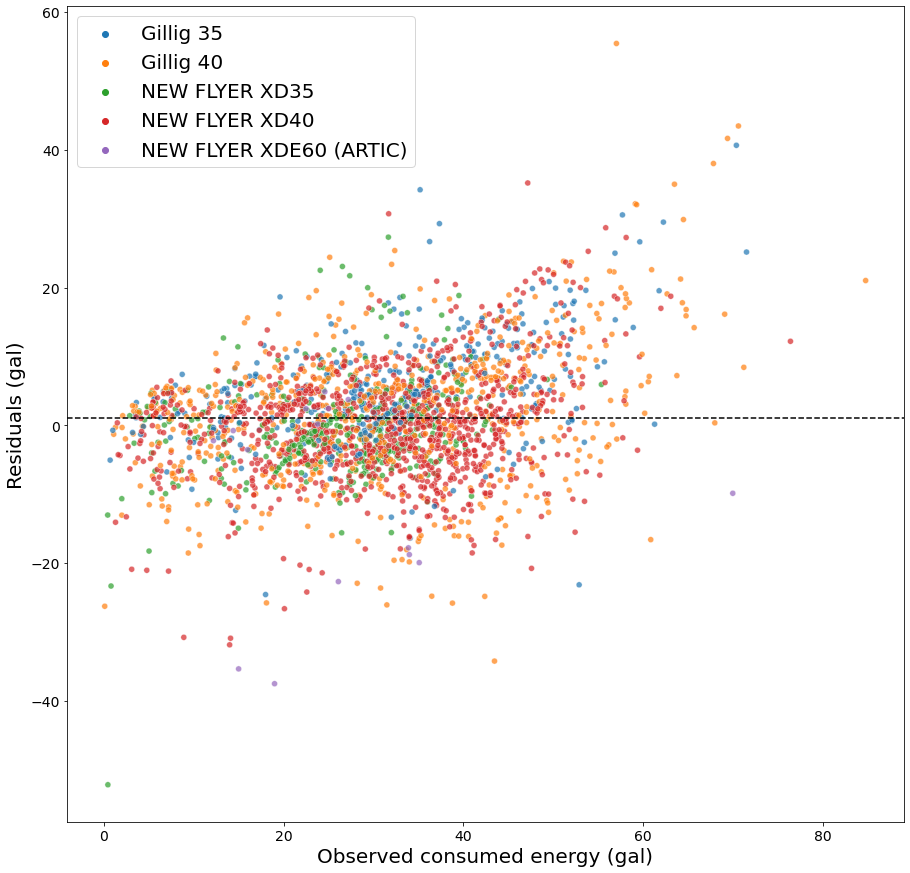

In [1061]:
fig, ax = plt.subplots(figsize=(15,15))
sns.scatterplot('gallons', 'residual', data=df_conventional, hue='VehicleModel', alpha=0.7)
plt.axhline(df_conventional['residual'].mean(),color='black', linestyle='--')
plt.ylabel('Residuals (gal)', fontsize=20)
plt.xlabel('Observed consumed energy (gal)', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=20)
fig.savefig(r'../../figures/residuals-vs-consumed-energy.png', dpi=400, bbox_inches='tight')

C:\Users\Mahsa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


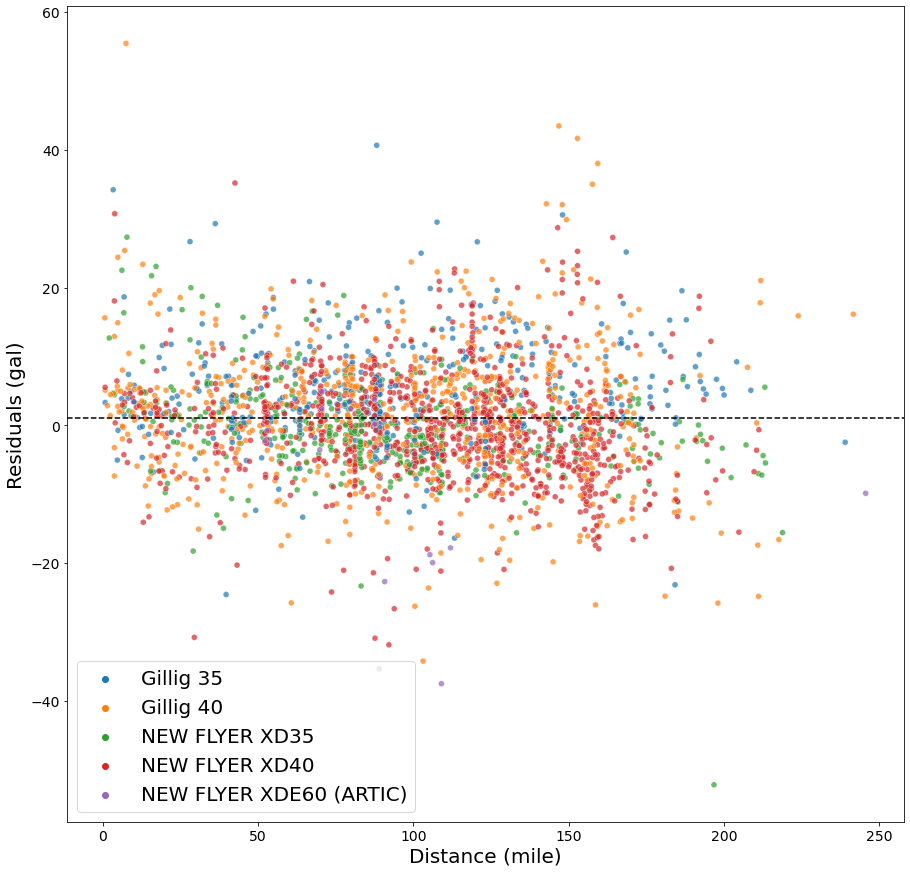

In [1060]:
fig, ax = plt.subplots(figsize=(15,15))
sns.scatterplot('dist', 'residual', data=df_conventional, hue='VehicleModel', alpha=0.7)
plt.axhline(df_conventional['residual'].mean(),color='black', linestyle='--')
plt.ylabel('Residuals (gal)', fontsize=20)
plt.xlabel('Distance (mile)', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=20)
#plt.plot(df_conventional['residual'].mean(), linewidth=2)
fig.savefig(r'../../figures/residuals-vs-dist.png', dpi=400, bbox_inches='tight')

In [1056]:
df_conventional['residual'].mean()

1.0940097193333536

<AxesSubplot:>

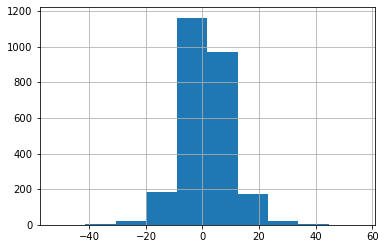

In [1057]:
df_conventional['residual'].hist()

In [1039]:
df_conventional.nlargest(20,['residual'])

,level_0,index,ServiceDateTime,Vehicle,gallons,date,Powertrain,dist,Energy,VehicleModel,residual
302,346,678,2022-04-06 21:51:00,1619,57.05,2022-04-06,conventional,7.451466,1.594517,Gillig 40,55.455483
585,629,1444,2022-04-14 19:29:00,1661,70.63,2022-04-14,conventional,146.833040,27.157602,Gillig 40,43.472398
593,637,2688,2022-04-27 19:31:00,1661,69.42,2022-04-27,conventional,152.845814,27.754067,Gillig 40,41.665933
2237,2281,240,2022-04-02 00:29:00,3310,70.40,2022-04-02,conventional,88.179157,29.734058,Gillig 35,40.665942
546,590,1686,2022-04-16 21:59:00,1657,67.85,2022-04-16,conventional,159.392757,29.830104,Gillig 40,38.019896
1612,1656,1378,2022-04-13 23:42:00,1841,47.18,2022-04-13,conventional,42.533680,11.985160,NEW FLYER XD40,35.194840
436,480,1887,2022-04-19 19:32:00,1652,63.51,2022-04-19,conventional,157.669557,28.492948,Gillig 40,35.017052
2280,2324,120,2022-04-01 00:28:00,3312,35.20,2022-04-01,conventional,3.311691,0.992105,Gillig 35,34.207895
343,387,1220,2022-04-12 19:35:00,1643,59.15,2022-04-12,conventional,142.827627,26.982346,Gillig 40,32.167654
472,516,541,2022-04-05 19:33:00,1654,59.30,2022-04-05,conventional,147.949615,27.255349,Gillig 40,32.044651


In [1040]:
df_conventional.nsmallest(20,['residual'])

,level_0,index,ServiceDateTime,Vehicle,gallons,date,Powertrain,dist,Energy,VehicleModel,residual
915,959,808,2022-04-07 23:15:00,1722,0.45,2022-04-07,conventional,196.805230,52.650400,NEW FLYER XD35,-52.200400
3018,3067,2878,2022-04-29 06:56:00,7902,19.00,2022-04-29,conventional,109.002254,56.527670,NEW FLYER XDE60 (ARTIC),-37.527670
3012,3061,2177,2022-04-22 05:54:00,7902,15.00,2022-04-22,conventional,88.987692,50.375162,NEW FLYER XDE60 (ARTIC),-35.375162
598,642,733,2022-04-07 16:04:00,1662,43.48,2022-04-07,conventional,103.110207,77.722255,Gillig 40,-34.242255
2815,2864,604,2022-04-06 05:30:00,7802,14.00,2022-04-06,conventional,92.111201,45.880316,NEW FLYER XD40,-31.880316
2923,2972,2519,2022-04-26 05:52:00,7814,14.10,2022-04-26,conventional,87.635194,45.019644,NEW FLYER XD40,-30.919644
2550,2594,1696,2022-04-17 05:57:00,3325,8.90,2022-04-17,conventional,29.433979,39.695805,NEW FLYER XD40,-30.795805
2816,2865,718,2022-04-07 05:55:00,7802,20.10,2022-04-07,conventional,93.830969,46.737201,NEW FLYER XD40,-26.637201
2190,2234,691,2022-04-06 22:54:00,3305,0.10,2022-04-06,conventional,100.477234,26.378558,Gillig 40,-26.278558
2206,2250,1950,2022-04-20 05:10:00,3305,31.50,2022-04-20,conventional,158.644087,57.582904,Gillig 40,-26.082904


In [1041]:
df_validation.loc[(df_validation['Vehicle']==7661)&(df_validation['date']=='2022-04-20')]

,index,ServiceDateTime,Vehicle,gallons,date,Powertrain,dist,Energy,VehicleModel
2808,2019,2022-04-20 20:59:00,7661,49.4,2022-04-20,conventional,NaN,NaN,NaN
2809,2020,2022-04-20 20:59:00,7661,59.4,2022-04-20,conventional,NaN,NaN,NaN


In [1042]:
df_conventional

,level_0,index,ServiceDateTime,Vehicle,gallons,date,Powertrain,dist,Energy,VehicleModel,residual
1,45,136,2022-04-01 15:34:00,1552,27.43,2022-04-01,conventional,53.128981,18.357928,Gillig 35,9.072072
2,46,266,2022-04-02 18:30:00,1552,33.15,2022-04-02,conventional,52.538729,16.982936,Gillig 35,16.167064
3,47,512,2022-04-05 17:57:00,1552,52.29,2022-04-05,conventional,182.556936,37.014156,Gillig 35,15.275844
4,48,657,2022-04-06 19:49:00,1552,36.69,2022-04-06,conventional,38.274092,24.864292,Gillig 35,11.825708
5,49,749,2022-04-07 18:41:00,1552,45.61,2022-04-07,conventional,166.541198,33.728877,Gillig 35,11.881123
...,...,...,...,...,...,...,...,...,...,...,...
3015,3064,2437,2022-04-25 18:43:00,7902,24.60,2022-04-25,conventional,70.479247,19.721750,NEW FLYER XDE60 (ARTIC),4.878250
3016,3065,2576,2022-04-26 20:14:00,7902,12.20,2022-04-26,conventional,52.211481,14.433267,NEW FLYER XDE60 (ARTIC),-2.233267
3017,3066,2656,2022-04-27 17:23:00,7902,23.80,2022-04-27,conventional,87.466541,23.623140,NEW FLYER XDE60 (ARTIC),0.176860
3018,3067,2878,2022-04-29 06:56:00,7902,19.00,2022-04-29,conventional,109.002254,56.527670,NEW FLYER XDE60 (ARTIC),-37.527670


In [1043]:
df_conventional_plot = df_conventional.groupby('date').agg({'gallons':'sum','Energy':'sum'})[['gallons','Energy']].reset_index()

In [1044]:
df_conventional_plot

,date,gallons,Energy
0,2022-04-01,2318.19,2127.688594
1,2022-04-02,2034.05,2027.254655
2,2022-04-03,908.60,944.327377
3,2022-04-04,3056.31,2950.167448
4,2022-04-05,3248.56,3146.467471
5,2022-04-06,3083.71,3034.848407
6,2022-04-07,3085.42,2994.968432
7,2022-04-08,2938.26,2924.043363
8,2022-04-09,1995.33,1991.415678
9,2022-04-10,882.93,859.687799


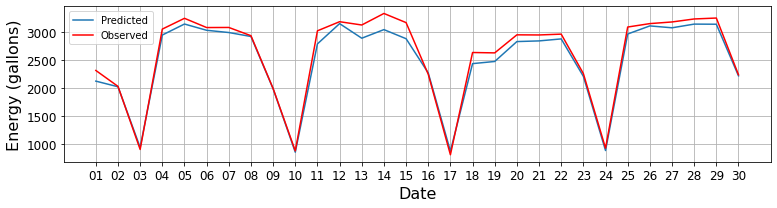

In [1045]:
# Plot time series
#figure(figsize=(12, 8), dpi=400)
fig, ax = plt.subplots(figsize=(11, 3))

fig=plt.plot(df_conventional_plot.date, df_conventional_plot.Energy, label='Predicted')
fig=plt.plot(df_conventional_plot.gallons, label='Observed', color='red')
#fig=plt.plot(df_daily_energy_validation_CDB.date, df_daily_energy_validation_CDB.gallons, label='Observed', color='red')

# Add title and labels

plt.xlabel('Date', fontsize=16)
plt.ylabel('Energy (gallons)', fontsize=16)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add legend

plt.legend()

# Auto space

plt.tight_layout()

# Set major formatter
date_form = DateFormatter("%d")
ax.xaxis.set_major_formatter(date_form)

plt.grid()

plt.savefig(r'../../figures/timeseries-energy-CDB.png', dpi=400, bbox_inches='tight')

# Display plot

plt.show() 

In [1046]:
df_hybrid_plot = df_hybrid.groupby('date').agg({'gallons':'sum','Energy':'sum'})[['gallons','Energy']].reset_index()

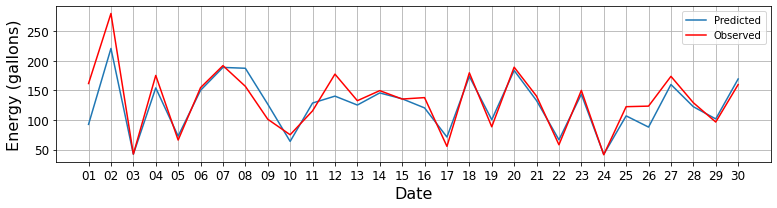

In [1047]:
# Plot time series
#figure(figsize=(12, 8), dpi=400)
fig, ax = plt.subplots(figsize=(11, 3))

fig=plt.plot(df_hybrid_plot.date, df_hybrid_plot.Energy, label='Predicted')
fig=plt.plot(df_hybrid_plot.gallons, label='Observed', color='red')

# Add title and labels

plt.xlabel('Date', fontsize=16)
plt.ylabel('Energy (gallons)', fontsize=16)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add legend

plt.legend()

# Auto space

plt.tight_layout()


plt.grid()

# Set major formatter
date_form = DateFormatter("%d")
ax.xaxis.set_major_formatter(date_form)

plt.savefig(r'../../figures/timeseries-energy-HEB.png', dpi=400, bbox_inches='tight')

# Display plot

plt.show() 

C:\Users\Mahsa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


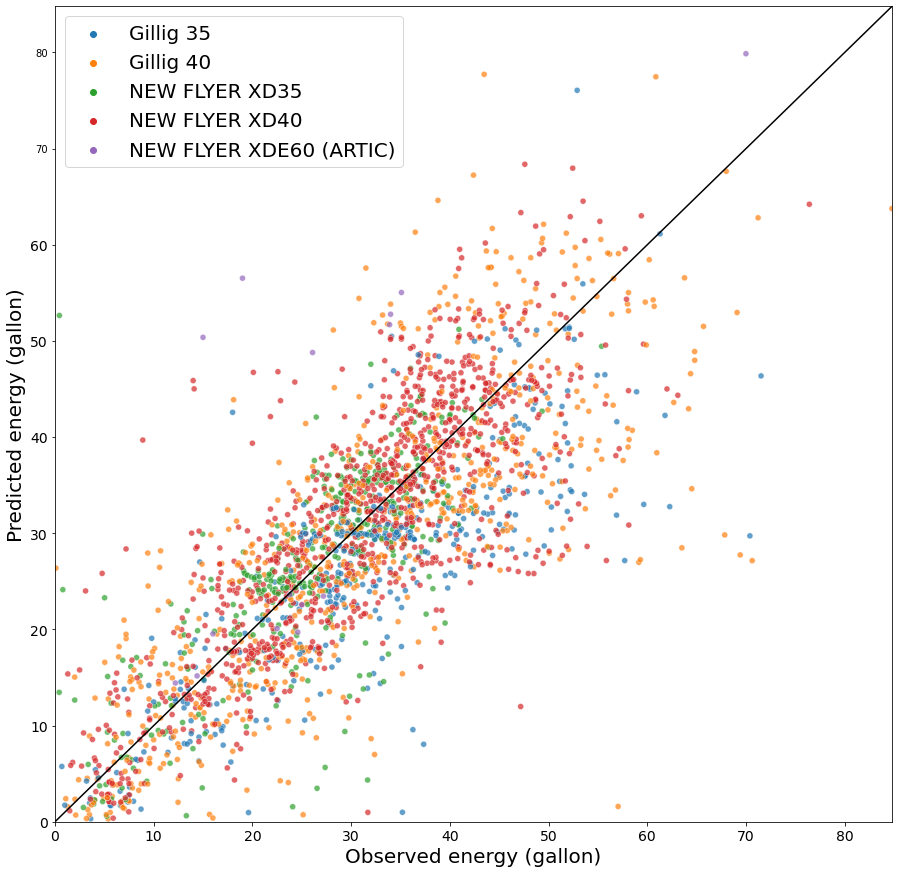

In [1058]:
fig, ax = plt.subplots(figsize=(15,15))
#plt.scatter(df_conventional['Real_Energy'], df_conventional['Energy'], c='crimson')
sns.scatterplot('gallons', 'Energy', data=df_conventional, hue='VehicleModel', alpha=0.7)

p1 = max(max(df_conventional['gallons']), max(df_conventional['Energy']))
p2 = min(min(df_conventional['gallons']), min(df_conventional['Energy']))
plt.plot([p1, p2], [p1, p2], 'k-')
plt.xlabel('Observed energy (gallon)', fontsize=20)
plt.ylabel('Predicted energy (gallon)', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=20)
plt.xlim([0, max(max(df_conventional['gallons']), max(df_conventional['Energy']))])
plt.ylim([0, max(max(df_conventional['gallons']), max(df_conventional['Energy']))])
fig.savefig(r'../../figures/actual-predicted-CDB-energy.png', dpi=400, bbox_inches='tight')
plt.show()

C:\Users\Mahsa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


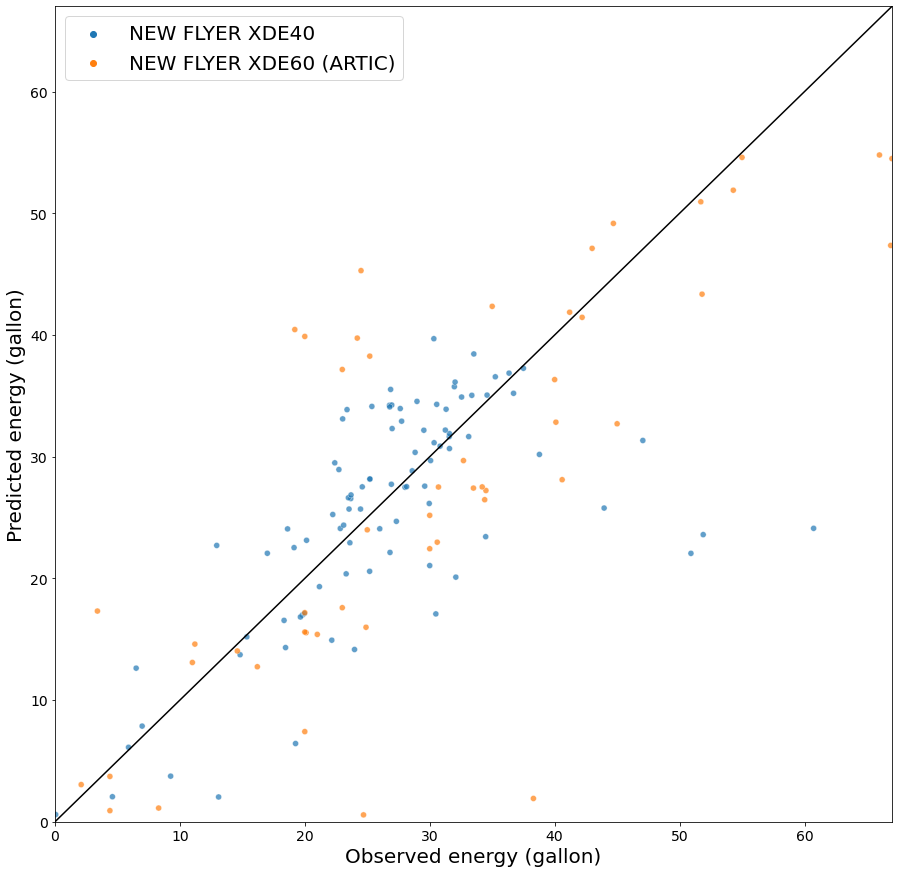

In [1059]:
fig, ax = plt.subplots(figsize=(15,15))
#plt.scatter(df_hybrid['Real_Energy'], df_hybrid['Energy'], c='crimson')
sns.scatterplot('gallons', 'Energy', data=df_hybrid, hue='VehicleModel', alpha=0.7)


p1 = max(max(df_hybrid['gallons']), max(df_hybrid['Energy']))
p2 = min(min(df_hybrid['gallons']), min(df_hybrid['Energy']))
plt.plot([p1, p2], [p1, p2], 'k-')
plt.xlabel('Observed energy (gallon)', fontsize=20)
plt.ylabel('Predicted energy (gallon)', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=20)
plt.xlim([0, max(max(df_hybrid['gallons']), max(df_hybrid['Energy']))])
plt.ylim([0, max(max(df_hybrid['gallons']), max(df_hybrid['Energy']))])
fig.savefig(r'../../figures/actual-predicted-HEB-energy.png', dpi=400, bbox_inches='tight')
plt.show()

In [1050]:
train_dates=['2022-04-01','2022-04-02','2022-04-03','2022-04-04','2022-04-05','2022-04-06','2022-04-07','2022-04-08','2022-04-09','2022-04-10','2022-04-11','2022-04-12','2022-04-13', '2022-04-14','2022-04-15','2022-04-16','2022-04-17','2022-04-18','2022-04-19','2022-04-20','2022-04-21','2022-04-22','2022-04-23']
train_df_conventional_plot = df_conventional_plot[df_conventional_plot.date.isin(train_dates)]
test_dates=['2022-04-24','2022-04-25','2022-04-26','2022-04-27','2022-04-28','2022-04-29','2022-04-30']
test_df_conventional_plot = df_conventional_plot[df_conventional_plot.date.isin(test_dates)]

In [1051]:
train_dates=['2022-04-01','2022-04-02','2022-04-03','2022-04-04','2022-04-05','2022-04-06','2022-04-07','2022-04-08','2022-04-09','2022-04-10','2022-04-11','2022-04-12','2022-04-13', '2022-04-14','2022-04-15','2022-04-16','2022-04-17','2022-04-18','2022-04-19','2022-04-20','2022-04-21','2022-04-22','2022-04-23']
train_df_hybrid_plot = df_hybrid_plot[df_hybrid_plot.date.isin(train_dates)]
test_dates=['2022-04-24','2022-04-25','2022-04-26','2022-04-27','2022-04-28','2022-04-29','2022-04-30']
test_df_hybrid_plot = df_hybrid_plot[df_hybrid_plot.date.isin(test_dates)]

In [1052]:
### Compute system level errors
rmse_conventional_train_system= mean_squared_error(train_df_conventional_plot['gallons'], train_df_conventional_plot['Energy'], squared=False)
rmse_conventional_test_system= mean_squared_error(test_df_conventional_plot['gallons'], test_df_conventional_plot['Energy'], squared=False)
rmse_hybrid_train_system = mean_squared_error(train_df_hybrid_plot['gallons'], train_df_hybrid_plot['Energy'], squared=False)
rmse_hybrid_test_system = mean_squared_error(test_df_hybrid_plot['gallons'], test_df_hybrid_plot['Energy'], squared=False)
MAPE_conventional_train_system = np.mean(np.abs((df_conventional_train['gallons'] - df_conventional_train['Energy']) / df_conventional_train['gallons'])) * 100
MAPE_conventional_test_system = np.mean(np.abs((df_conventional_test['gallons'] - df_conventional_test['Energy']) / df_conventional_test['gallons'])) * 100
MAPE_hybrid_train_system = np.mean(np.abs((df_hybrid_train['gallons'] - df_hybrid_train['Energy']) / df_hybrid_train['gallons'])) * 100
MAPE_hybrid_test_system = np.mean(np.abs((df_hybrid_test['gallons'] - df_hybrid_test['Energy']) / df_hybrid_test['gallons'])) * 100

In [1053]:
print('rmse_conventional_train_system:',rmse_conventional_train_system)
print('rmse_conventional_test_system:',rmse_conventional_test_system)
print('rmse_hybrid_train_system:',rmse_hybrid_train_system)
print('rmse_hybrid_test_system:',rmse_hybrid_test_system)
print('MAPE_conventional_train_system:',rmse_hybrid_test_system)
print('MAPE_conventional_test_system:',rmse_hybrid_test_system)
print('MAPE_hybrid_train_system:',rmse_hybrid_test_system)
print('MAPE_hybrid_test_system:',rmse_hybrid_test_system)

rmse_conventional_train_system: 139.90543135653184
rmse_conventional_test_system: 85.13171040742637
rmse_hybrid_train_system: 23.801249288436438
rmse_hybrid_test_system: 16.25180620587814
MAPE_conventional_train_system: 16.25180620587814
MAPE_conventional_test_system: 16.25180620587814
MAPE_hybrid_train_system: 16.25180620587814
MAPE_hybrid_test_system: 16.25180620587814
